In [55]:
import xarray as xr

# Load the netCDF file
ds = xr.open_dataset('../data/bathymetry/bathy_salishsea_1500m_20210706.nc')
# Define the bounding box
lon_min, lat_min, lon_max, lat_max = [-124.05, 49.31, -123.95, 49.35]


# Extract the latitude and longitude variables
lon = ds['nav_lon']
lat = ds['nav_lat']

# Determine the indices of the bounding box in the latitude and longitude dimensions
lon_indices = (lon >= lon_min) & (lon <= lon_max)
lon_indices = (lon >= lon_min)
lat_indices = (lat >= lat_min) & (lat <= lat_max)

# Extract the subset of data within the bounding box.=
data_subset = ds.where((ds.nav_lon>= lon_min)&(ds.nav_lon<= lon_max)&(ds.nav_lat>=lat_min)&(ds.nav_lat<=lat_max))
data_subset = ds.isel(nav_lon=ds.nav_lon >= lon_min)

# Extract the indices of the bounding box in the x and y dimensions
x_indices = data_subset['x'].values
y_indices = data_subset['y'].values

ValueError: Dimensions {'nav_lon'} do not exist. Expected one or more of Frozen({'y': 299, 'x': 132})

In [62]:
lats = ds.nav_lat.mean(dim='x')
lons = ds.nav_lon.mean(dim='y')
dataset = ds.drop(['nav_lat', 'nav_lon'])
dataset.coords['nav_lat'] = lats
dataset.coords['nav_lon'] = lons
dataset = dataset.swap_dims({'x': 'nav_lon', 'y': 'nav_lat'})

In [68]:
dataset.isel(nav_lat = (dataset.nav_lat>=lat_min)&(dataset.nav_lat<=lat_max))

<xarray.Dataset>
Dimensions:     (nav_lat: 4, nav_lon: 132)
Coordinates:
  * nav_lat     (nav_lat) float32 49.31 49.32 49.33 49.35
  * nav_lon     (nav_lon) float32 -124.9 -124.9 -124.9 ... -122.9 -122.9 -122.8
Data variables:
    Bathymetry  (nav_lat, nav_lon) float64 nan nan nan nan ... nan nan nan nan

In [70]:
dataset[0]

KeyError: 0

In [73]:
ds[0,0]

KeyError: (0, 0)

In [93]:
f = '..//data//grid//coordinates_salishsea_1500m.nc'
#bathyfilename = 'bathy_salishsea_1500m_before_manual_edits.nc'
#bathyfilename = '..//data//bathymetry//bathy_salishsea_1500m_Dec30.nc'
import netCDF4 as nc
import numpy as np


with nc.Dataset(f) as ncid:
    glamt = ncid.variables["glamt"][0, :, :].filled()
    gphit = ncid.variables["gphit"][0, :, :].filled()
    glamu = ncid.variables["glamu"][0, :, :].filled()
    gphiu = ncid.variables["gphiu"][0, :, :].filled()
    glamv = ncid.variables["glamv"][0, :, :].filled()
    gphiv = ncid.variables["gphiv"][0, :, :].filled()
    glamf = ncid.variables["glamf"][0, :, :].filled()
    gphif = ncid.variables["gphif"][0, :, :].filled()



In [98]:
t1 = gphit.iloc[gphit>=lat_max]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [170]:
coords = np.stack((gphit, glamt))
indices_bounding = np.array(np.where((coords[0]>=lat_min) &(coords[0]<=lat_max)&(coords[1]>=lon_min)&(coords[1]<=lon_max)))

n = 0
print("{")
while n < len(indices_bounding[1]):
    print("(" + str(indices_bounding[0,n]) + "," + str(indices_bounding[1,n]) + "),")
    n+=1
print("}")

{
(171,74),
(172,72),
(172,73),
(172,74),
(173,70),
(173,71),
(173,72),
(173,73),
(173,74),
(173,75),
(174,70),
(174,71),
(174,72),
(174,73),
(174,74),
(175,71),
(175,72),
}


In [116]:
tuple1 = (1, 2, 3, 4, 5)
tuple2 = (4, 5, 6, 7, 8)

common_values = tuple(set(tuple1).intersection(tuple2))
print(common_values)[1]

(4, 5)


In [132]:
np.array(lats_ind).shape


(2, 449)

In [133]:
lats_ind = np.where((gphit >= lat_min))
np.array(lats_ind).shape

(2, 16314)

In [142]:
coords = np.stack((gphit, glamt))

In [143]:
coords.shape

(2, 299, 132)

In [144]:
coords[0]

array([[46.86481399, 46.87063561, 46.87635742, ..., 47.58827299,
        47.59383739, 47.59940119],
       [46.87496253, 46.88105553, 46.8869793 , ..., 47.60039739,
        47.60596374, 47.61152949],
       [46.885436  , 46.89162913, 46.8976776 , ..., 47.61251898,
        47.61808728, 47.62365499],
       ...,
       [50.36006877, 50.36611931, 50.37212688, ..., 51.05973614,
        51.06467079, 51.06958588],
       [50.37199558, 50.37807639, 50.38409846, ..., 51.07118347,
        51.07609448, 51.08097854],
       [50.38397433, 50.39009017, 50.39611953, ..., 51.082653  ,
        51.08754214, 51.09239442]])

In [172]:
indices_bounding.shape

(2, 17)

In [205]:
lon_min, lat_min, lon_max, lat_max = [-124.05, 49.31, -123.95, 49.35]
coords = np.stack((gphit, glamt))
lat_indices = np.array(np.where((coords[0]>=lat_min) & (coords[0] <= lat_max)))
lon_indices = np.array(np.where((coords[1]>=lon_min) & (coords[1] <= lon_max)))

In [207]:
lon_coords.shape

(2, 1321)

In [192]:
n = 0
print("{")
while n < len(lat_coords[1]):
    print("(" + str(lat_coords[0,n]) + "," + str(lat_coords[1,n]) + "),")
    n+=1
print("}")

{
(144,130),
(144,131),
(145,128),
(145,129),
(145,130),
(145,131),
(146,126),
(146,127),
(146,128),
(146,129),
(146,130),
(146,131),
(147,124),
(147,125),
(147,126),
(147,127),
(147,128),
(147,129),
(147,130),
(148,122),
(148,123),
(148,124),
(148,125),
(148,126),
(148,127),
(148,128),
(149,120),
(149,121),
(149,122),
(149,123),
(149,124),
(149,125),
(149,126),
(150,118),
(150,119),
(150,120),
(150,121),
(150,122),
(150,123),
(150,124),
(151,116),
(151,117),
(151,118),
(151,119),
(151,120),
(151,121),
(151,122),
(152,114),
(152,115),
(152,116),
(152,117),
(152,118),
(152,119),
(152,120),
(153,111),
(153,112),
(153,113),
(153,114),
(153,115),
(153,116),
(153,117),
(153,118),
(154,109),
(154,110),
(154,111),
(154,112),
(154,113),
(154,114),
(154,115),
(155,107),
(155,108),
(155,109),
(155,110),
(155,111),
(155,112),
(155,113),
(156,105),
(156,106),
(156,107),
(156,108),
(156,109),
(156,110),
(156,111),
(157,103),
(157,104),
(157,105),
(157,106),
(157,107),
(157,108),
(157,109),
(158,101

In [184]:
len(lat_coords[])

2

In [194]:

lat_coords.shape

(2, 449)

In [195]:
lon_coords.shape

(2, 1321)

In [5]:
f = '..//data//grid//coordinates_salishsea_1500m.nc'
#bathyfilename = 'bathy_salishsea_1500m_before_manual_edits.nc'
#bathyfilename = '..//data//bathymetry//bathy_salishsea_1500m_Dec30.nc'
import netCDF4 as nc
import numpy as np

with nc.Dataset(f) as ncid:
    glamt = ncid.variables["glamt"][0, :, :].filled()
    gphit = ncid.variables["gphit"][0, :, :].filled()
    glamu = ncid.variables["glamu"][0, :, :].filled()
    gphiu = ncid.variables["gphiu"][0, :, :].filled()
    glamv = ncid.variables["glamv"][0, :, :].filled()
    gphiv = ncid.variables["gphiv"][0, :, :].filled()
    glamf = ncid.variables["glamf"][0, :, :].filled()
    gphif = ncid.variables["gphif"][0, :, :].filled()

lon_min, lat_min, lon_max, lat_max = [-124.05, 49.31, -123.95, 49.35]
coords = np.stack((gphit, glamt))
lat_indices = np.array(np.where((coords[0]>=lat_min) & (coords[0] <= lat_max)))
lon_indices = np.array(np.where((coords[1]>=lon_min) & (coords[1] <= lon_max)))

matching_pairs = []
clip_coords = []
for i in range(lat_indices.shape[1]):
    for j in range(lon_indices.shape[1]):
        if np.array_equal(lat_indices[:, i], lon_indices[:, j]):
            matching_pairs.append(lon_indices[:, j])
            new_lon = glamt[lat_indices[:,i][0],lat_indices[:,i][1]]
            new_lat = gphit[lat_indices[:,i][0],lat_indices[:,i][1]]
            clip_coords.append([new_lon,new_lat])
#print(len(matching_pairs))
print(clip_coords)

[[-123.95334505515179, 49.312652069784555], [-123.99448662731533, 49.313083339170944], [-123.97893285685436, 49.31874585328946], [-123.96337953567067, 49.3244067232406], [-124.03562639022503, 49.3135127287774], [-124.02007247533815, 49.31917692513518], [-124.00451903049522, 49.32483945592148], [-123.98896605910087, 49.3305003296823], [-123.97341356415288, 49.33615955533629], [-123.95786154824054, 49.34181714216968], [-124.04565681086306, 49.32527032988502], [-124.03010363661546, 49.33093288604075], [-124.01455096016696, 49.33659377232775], [-123.99899878484088, 49.342252997285904], [-123.98344711353927, 49.34791056983021], [-124.0401343000322, 49.342687058769634], [-124.0245823886545, 49.34834629249602]]


In [272]:
np.array(clip_coords)[:,1]

array([49.31265207, 49.31308334, 49.31874585, 49.32440672, 49.31351273,
       49.31917693, 49.32483946, 49.33050033, 49.33615956, 49.34181714,
       49.32527033, 49.33093289, 49.33659377, 49.342253  , 49.34791057,
       49.34268706, 49.34834629])

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os 
import numpy as np
import netCDF4 as nc
import datetime as dt

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle


In [19]:
# clipped using cdo sellatlonbox
folder_path = "C:\\Users\\Greig\\Downloads\\"  
file_name = "SalishSea1500-RUN203_1h_grid_T_y1980m01_clipped.nc"   
full_file_path = folder_path + "\\" + file_name        
mod = xr.open_dataset(full_file_path)
mod_coord = mod.get(['nav_lat','nav_lon'])

# clipped using cdo sellindexbox
 
file_name = "deleteme2.nc"   
full_file_path = folder_path + "\\" + file_name        
mod_idx = xr.open_dataset(full_file_path)
mod_coord_idx = mod_idx.get(['nav_lat','nav_lon'])


C:\Users\Greig\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Greig\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


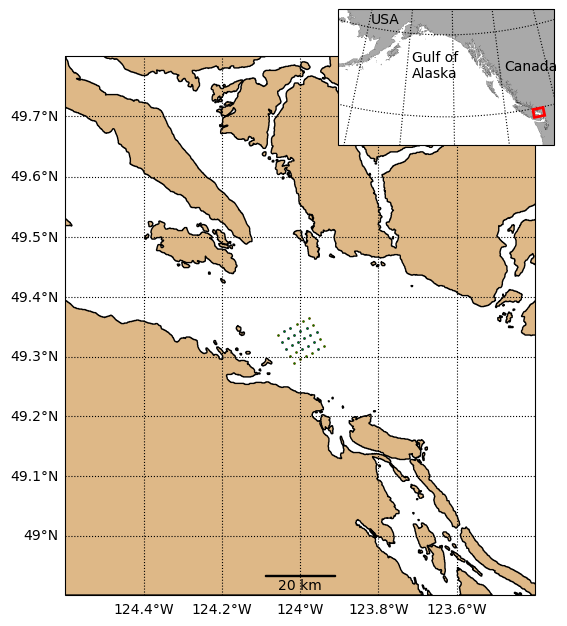

In [20]:
alpha = 0.5 # for point transparency - GO
markersize = 0.7
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


subdomain = [114, 397, 334, 897]
fig = plt.figure(figsize=(9, 7))
gs = plt.GridSpec(1, 1)#, width_ratios=[1.8, 1], wspace=0.13)

# Map Left
xlim, ylim = [-124.6, -123.4], [48.9, 49.8]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full (low for easy render)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))
scalebar = AnchoredSizeBar(ax.transData,
                           20000, '20 km', 'lower center', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
xlocs = [-123, -123.2, -123.4, -123.6, -123.8, -124, -124.2, -124.4, -124.6, -124.8, -125]
ylocs = [49, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50]

gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax.add_artist(scalebar)

# ax.text(0.15, 0.1, 'Pacific\nOcean', weight='bold', fontsize = 12, transform=ax.transAxes)
# ax.text(0.32, 0.307, 'Juan de Fuca', weight='bold', transform=ax.transAxes, rotation=-19.5)
# ax.text(0.555, 0.305, 'Strait', weight='bold', transform=ax.transAxes, rotation=10.5)
# ax.text(0.82, 0.18, 'Puget\nSound', weight='bold', transform=ax.transAxes)

# ax.text(0.355, 0.4851, 'Strait of Georgia', weight='bold', transform=ax.transAxes, rotation=-30, color='w')
# #ax.text(0.010, 0.755, 'Johnstone', weight='bold', transform=ax.transAxes, rotation=-20)
# ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='bold', transform=ax.transAxes, rotation=-0)
# #ax.text(0.16, 0.675, 'Strait', weight='bold', transform=ax.transAxes, rotation=-60)

# ax.text(0.44, 0.38, 'Haro\nStrait', weight='bold', transform=ax.transAxes)
# ax.text(0.72, 0.55, 'Fraser\nRiver', weight='bold', transform=ax.transAxes)
# ax.text(0.35, 0.9, 'Bute Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.42, 0.80, 'Toba Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.53, 0.75, 'Jervis Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.60, 0.67, 'Howe Sound', weight='bold', transform=ax.transAxes)
# ax.text(0.11, 0.64, 'Texada Island', weight='bold',fontstyle="italic", 
#         color = 'k', fontsize = 10, transform=ax.transAxes)

# obs
#ax.plot(all_obs_coords['longitude'][:], all_obs_coords['latitude'][:], 'b+', transform=crs.PlateCarree(), alpha=alpha, markersize=markersize)
# clipped model pts
ax.plot(mod_coord['nav_lon'][:], mod_coord['nav_lat'][:], 'ro', transform=crs.PlateCarree(), alpha=1, markersize=markersize)
ax.plot(np.array(clip_coords)[:,0], np.array(clip_coords)[:,1], 'bo', transform=crs.PlateCarree(), alpha=1, markersize=markersize)
ax.plot(mod_coord_idx['nav_lon'][:], mod_coord_idx['nav_lat'][:], 'go', transform=crs.PlateCarree(), alpha=1, markersize=markersize)

#Map Inset
xmap, ymap = [-161, -122], [45, 62]
ax2 = fig.add_axes([0.555, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax2.set_extent(xmap + ymap)
ax2.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray', linewidth=0.1))
ax2.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim))+1, int(np.diff(ylim))+1,
    transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10, linewidth=2
))

ax2.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax2.transAxes)
ax2.text(0.77, 0.55, 'Canada', transform=ax2.transAxes)
ax2.text(0.15, 0.9, 'USA', transform=ax2.transAxes)

xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
ax2.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
fig.canvas.draw()

#ax.set_title('Nanoose CTD observation location (red) \n on standard Salish Sea map',zorder = 100)

#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# # Colorbar
# cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='surface diatom concentration (mmol N m$^{-3}$)')

# fig.savefig('./paper_figs/MF01-domain.jpg', bbox_inches='tight', dpi = 300)